# stuff

Setup

## Imports

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF

## Loading

In [43]:
# Load the audio file
filename = '../mp3/chameleon.wav'  # Replace with your file path
y, sr = librosa.load(filename, sr=None)  # Load audio, preserving the original sample rate


Generate a spectrogram with a Hanning window

# stuff b2

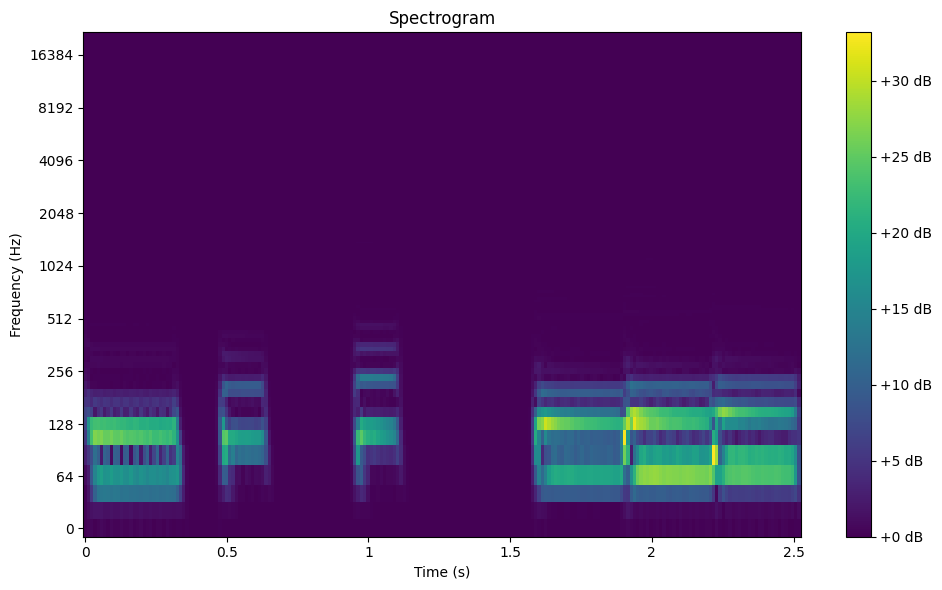

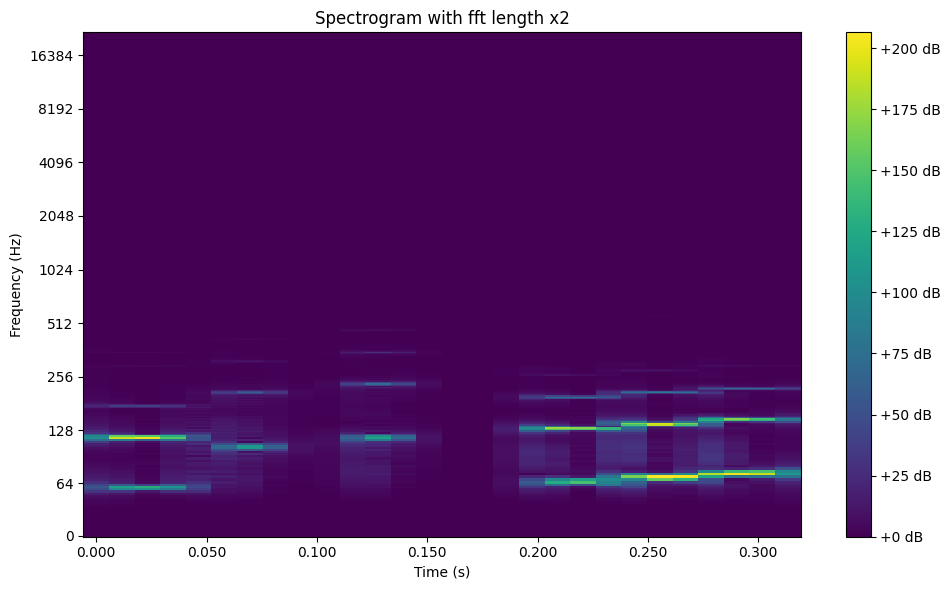

In [44]:
n_fft_1 = 2048
win_length_1 = n_fft_1
n_fft_2 = 16384
win_length_2 = n_fft_2
X_1 = np.abs(librosa.stft(y, window='hann', n_fft=n_fft_1, win_length=win_length_1))
X_2 = np.abs(librosa.stft(y, window='hann', n_fft=n_fft_2, win_length=win_length_2))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_1, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_2, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with fft length x2')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


Generate the W and H matrices

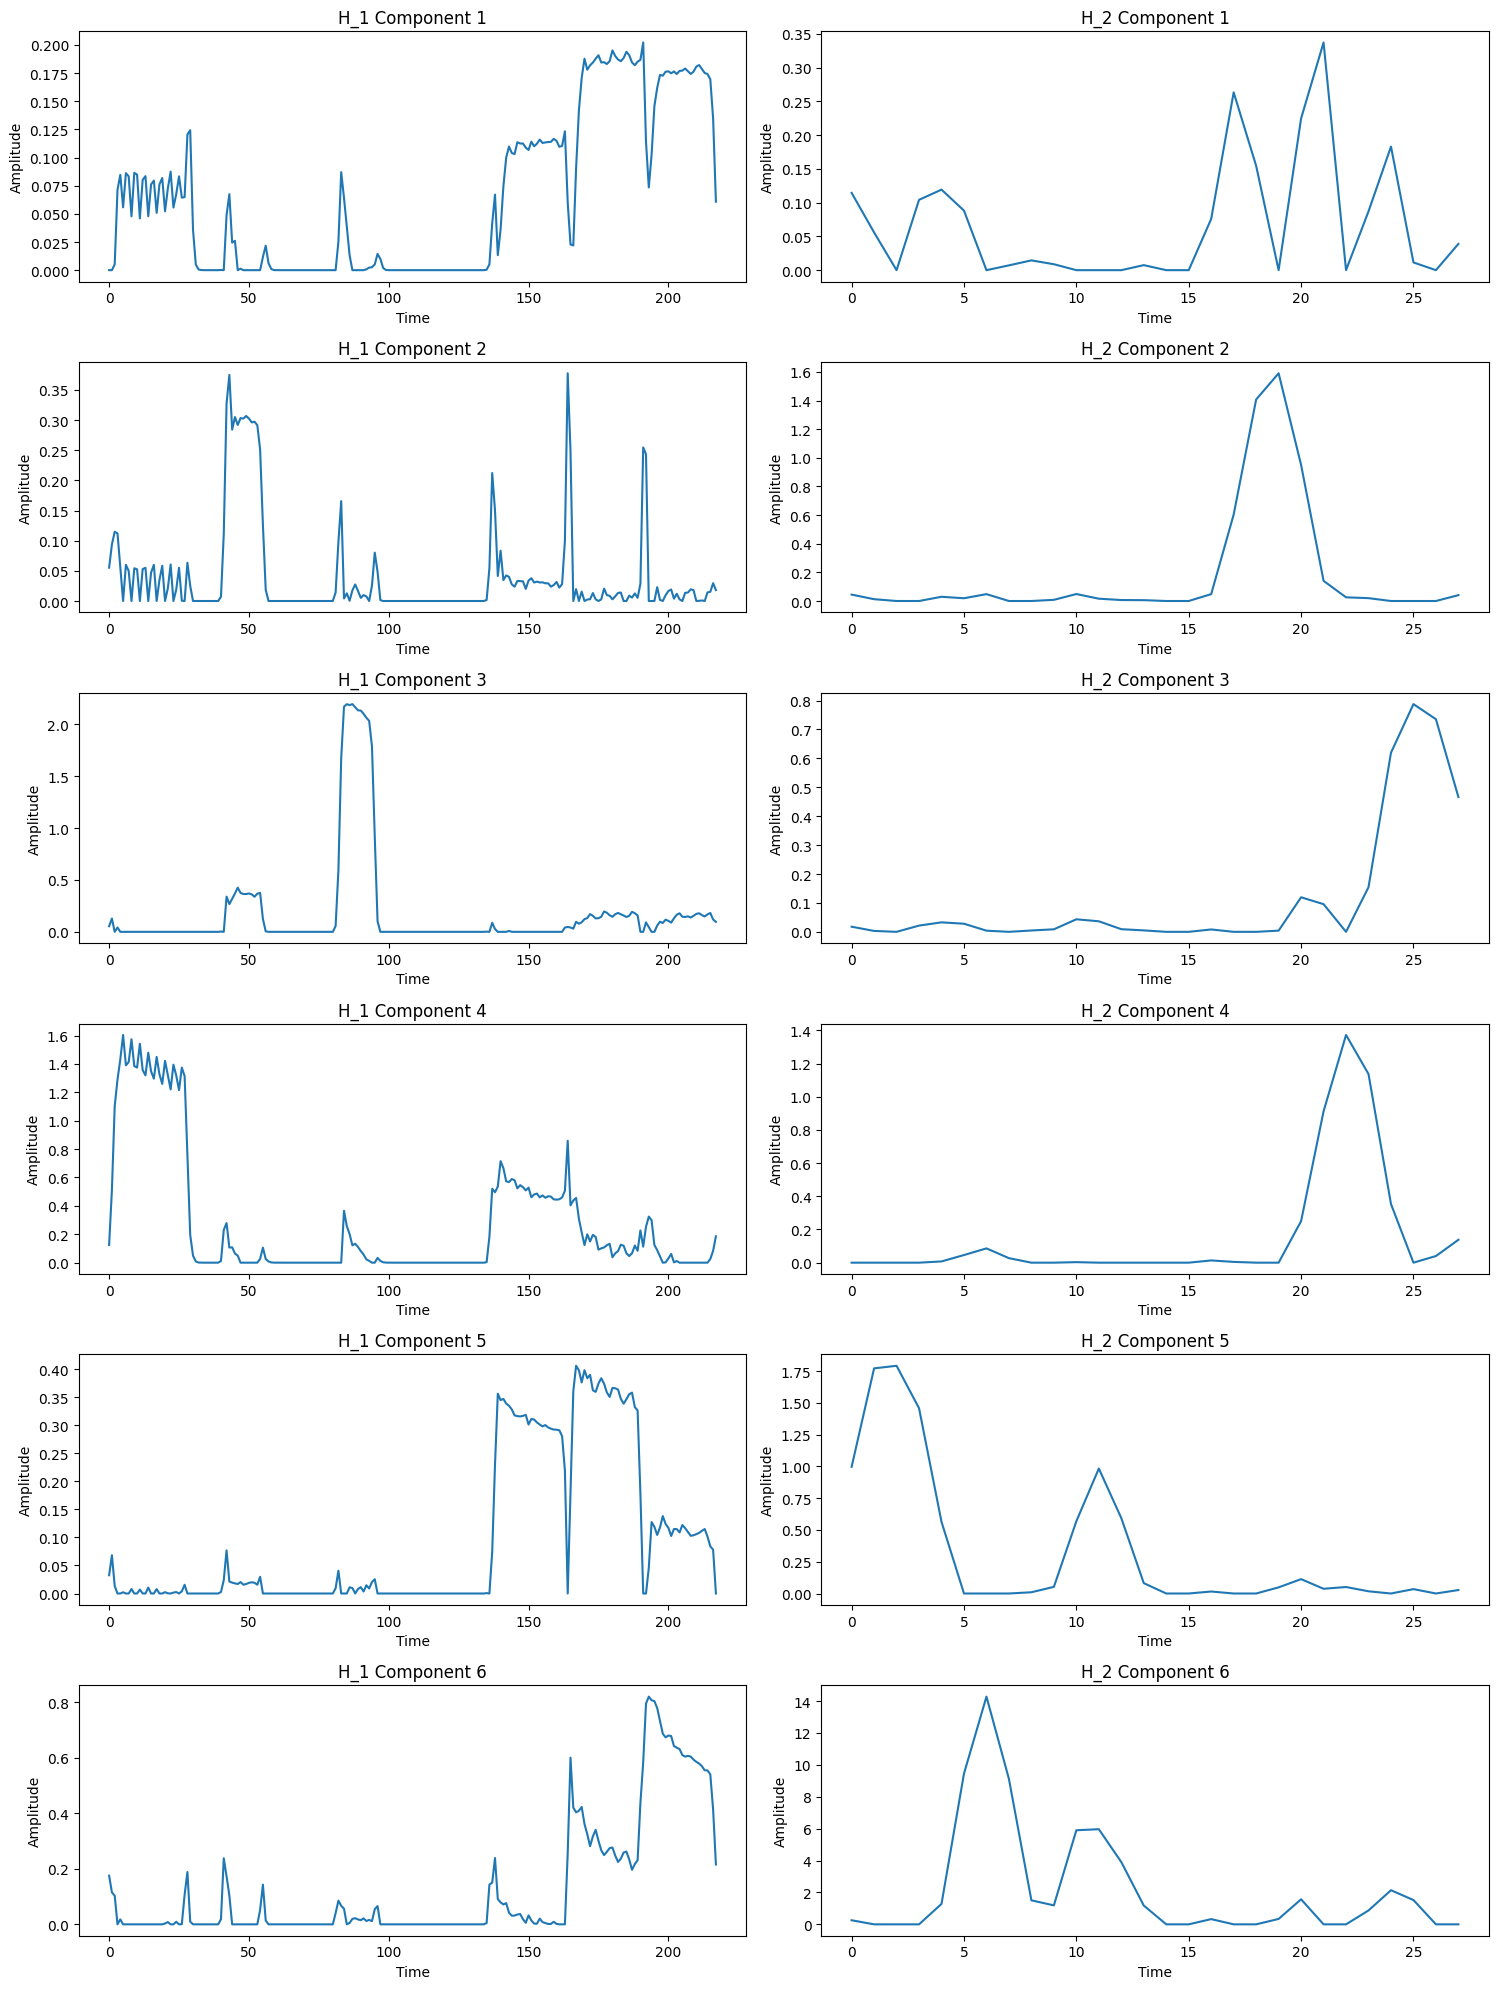

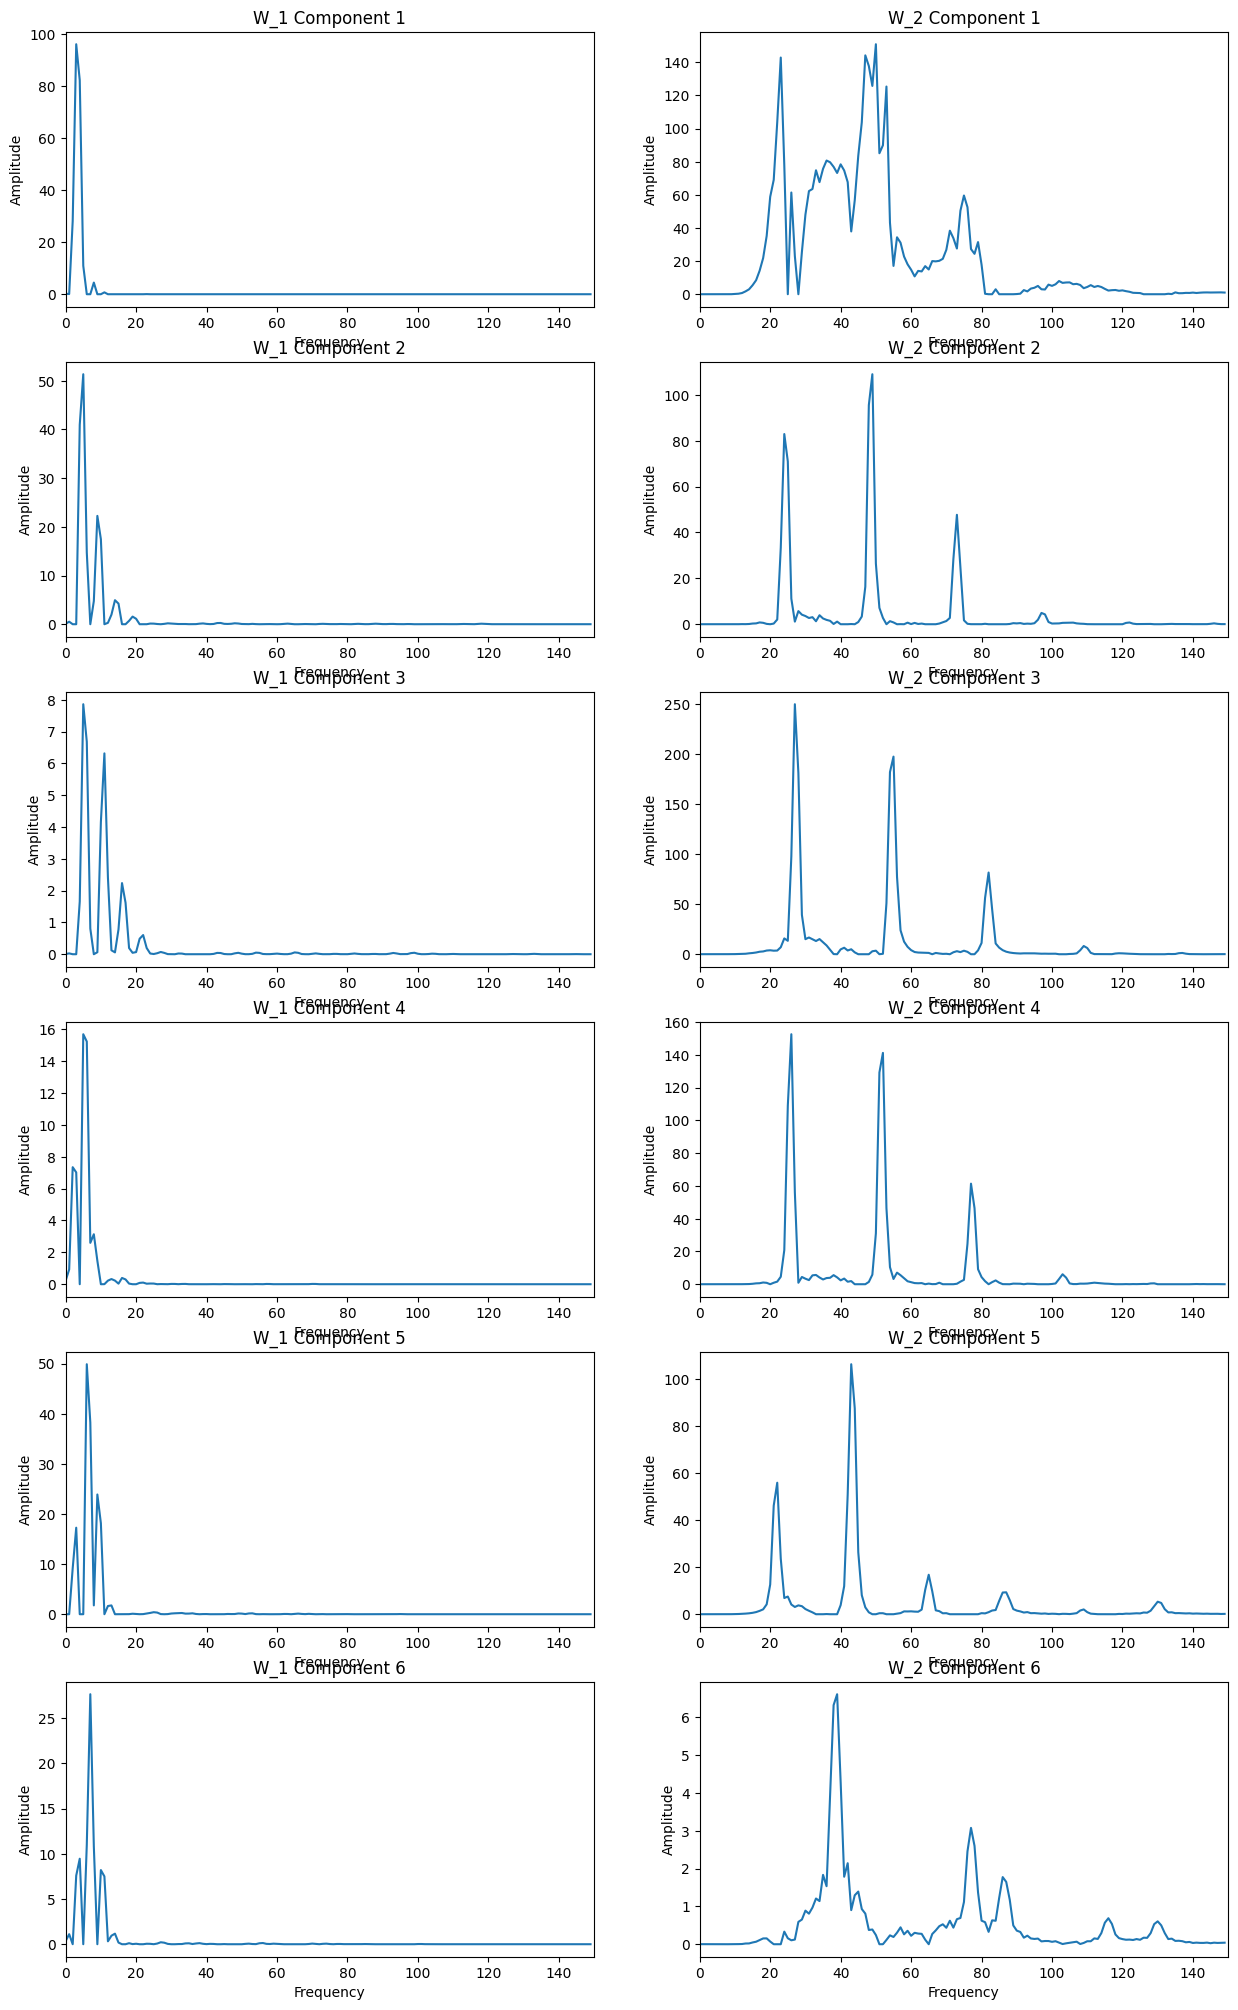

In [45]:
n_components = 6

model_1 = NMF(n_components=n_components, init='random', random_state=0, max_iter=1000)
model_2 = NMF(n_components=n_components, init='random', random_state=0, max_iter=1000)

# Fit the model to the data
W_1 = model_1.fit_transform(X=X_1)
W_2 = model_2.fit_transform(X=X_2)

# Get the H matrix
H_1 = model_1.components_
H_2 = model_2.components_

# Plot the H matrices
fig, axs = plt.subplots(n_components, 2, figsize=(15, 20))
for i in range(n_components):
    axs[i, 0].plot(H_1[i])
    axs[i, 0].set_title(f'H_1 Component {i+1}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Amplitude')
    
    axs[i, 1].plot(H_2[i])
    axs[i, 1].set_title(f'H_2 Component {i+1}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the W matrices with zoomed-in frequencies
fig, axs = plt.subplots(n_components, 2, figsize=(15, 25))
freq_limit = 150
for i in range(n_components):
    axs[i, 0].plot(W_1[:freq_limit, i])
    axs[i, 0].set_title(f'W_1 Component {i+1}')
    axs[i, 0].set_xlabel('Frequency')
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 0].set_xlim(0, freq_limit)
    
    axs[i, 1].plot(W_2[:freq_limit, i])
    axs[i, 1].set_title(f'W_2 Component {i+1}')
    axs[i, 1].set_xlabel('Frequency')
    axs[i, 1].set_ylabel('Amplitude')
    axs[i, 1].set_xlim(0, freq_limit)
